In [1]:
# Import necessory Libraries

# For Data Analysis 
import pandas as pd 
import numpy as np

# For Data Visualization 
import matplotlib.pyplot as plt 
import seaborn as sns

# Data Pre-Processsung
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler


# Classifier Libraries
from sklearn.linear_model import SGDClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

# pip install xgboost
from xgboost import XGBClassifier 
from sklearn.svm import LinearSVC, SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
from sklearn.metrics import confusion_matrix

import warnings
warnings. filterwarnings ("ignore")

In [3]:
import sys
print(sys.modules.keys())

dict_keys(['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', '_io', 'marshal', 'posix', '_frozen_importlib_external', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', '_abc', 'abc', 'io', '__main__', '_stat', 'stat', '_collections_abc', 'genericpath', 'posixpath', 'os.path', 'os', '_sitebuiltins', 'encodings.utf_8_sig', '_distutils_hack', 'types', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib', 'importlib._abc', 'importlib.util', 'importlib.machinery', 'google', 'sphinxcontrib', 'zope', 'site', 'runpy', '_operator', 'operator', 'itertools', 'keyword', 'reprlib', '_collections', 'collections', '_functools', 'functools', 'enum', '_sre', 're._constants', 're._parser', 're._casefix', 're._compiler', 'copyreg', 're', 'collections.abc', 'contextlib', '_typing', 'typing.io', 'typing.re', 'typing', 'ipykernel._version', '__future__', '_json', 'json.scanner', 'json.decode

In [4]:
print(globals().keys())

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__session__', '_i', '_ii', '_iii', '_i1', 'pd', 'np', 'plt', 'sns', 'train_test_split', 'MinMaxScaler', 'SGDClassifier', 'KNeighborsClassifier', 'RandomForestClassifier', 'LogisticRegression', 'XGBClassifier', 'LinearSVC', 'SVC', 'GaussianNB', 'DecisionTreeClassifier', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score', 'roc_auc_score', 'confusion_matrix', 'warnings', '_i2', '_exit_code', '_i3', 'sys', '_i4'])


In [5]:
# Load dataset - From Seaborn
df = pd.read_csv(r"/Users/machi/Downloads/diabetes_prediction_dataset - diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
df.colums = ["Gender", "Age", "Hypertension", "Heart_Disease", "Smoking_History", "BMI", "Hemoglobin_Alc_Level", "Blood_Glucose_level", "Diabetes"] 
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
df.columns = ['Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Smoking_History', 'BMI', 'Hemoglobin_Alc_Level', 'Blood_Glucose_level', 'Diabetes'] 
df.head()

,Gender,Age,Hypertension,Heart_Disease,Smoking_History,BMI,Hemoglobin_Alc_Level,Blood_Glucose_level,Diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [8]:
#Get dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                100000 non-null  object 
 1   Age                   100000 non-null  float64
 2   Hypertension          100000 non-null  int64  
 3   Heart_Disease         100000 non-null  int64  
 4   Smoking_History       100000 non-null  object 
 5   BMI                   100000 non-null  float64
 6   Hemoglobin_Alc_Level  100000 non-null  float64
 7   Blood_Glucose_level   100000 non-null  int64  
 8   Diabetes              100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
# get dataframe numerical desciption
df.describe()

,Age,Hypertension,Heart_Disease,BMI,Hemoglobin_Alc_Level,Blood_Glucose_level,Diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Gender                  0
Age                     0
Hypertension            0
Heart_Disease           0
Smoking_History         0
BMI                     0
Hemoglobin_Alc_Level    0
Blood_Glucose_level     0
Diabetes                0
dtype: int64


<Axes: >

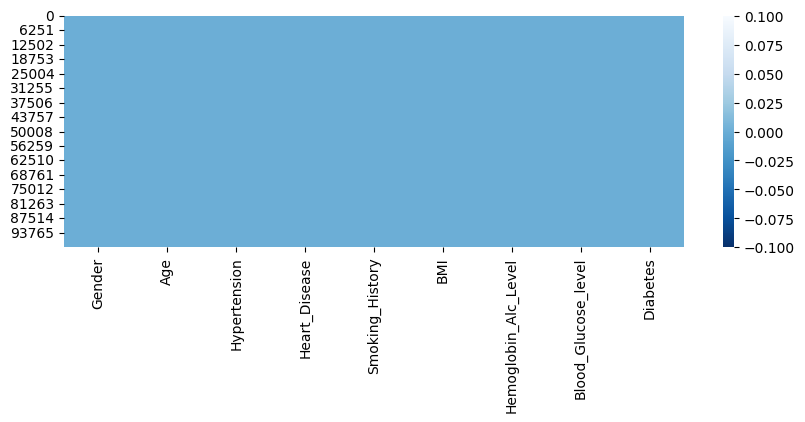

In [10]:
# check for missing values
print(df.isnull().sum())

#visualizing the missing data
plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

### EDA - Univariate Analysis

In [38]:
df.columns

Index(['Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Smoking_History',
       'BMI', 'Hemoglobin_Alc_Level', 'Blood_Glucose_level', 'Diabetes'],
      dtype='object')

<Axes: xlabel='Hemoglobin_Alc_Level'>

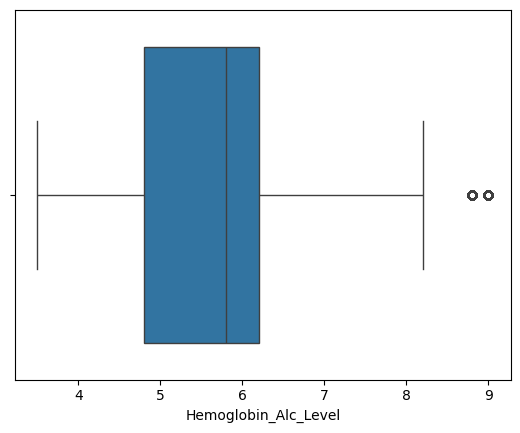

In [39]:
#check for outliers 
sns.boxplot(x=df["Hemoglobin_Alc_Level"])

<Axes: xlabel='BMI'>

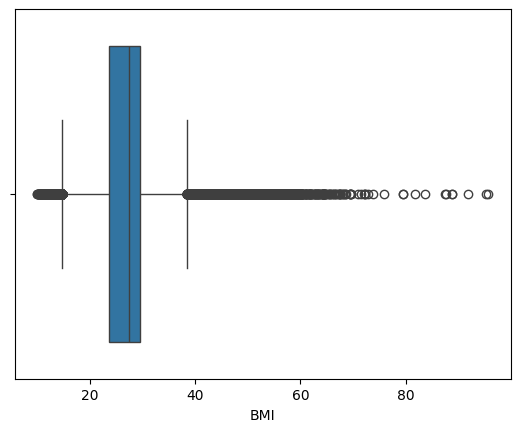

In [40]:
#check for outliers 
sns.boxplot(x=df["BMI"])

<Axes: xlabel='Blood_Glucose_level'>

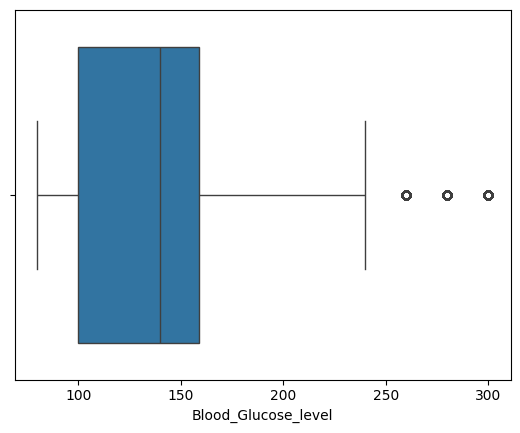

In [41]:
#check for outliers 
sns.boxplot(x=df["Blood_Glucose_level"])

Text(0.5, 1.0, 'Total Number of patients')

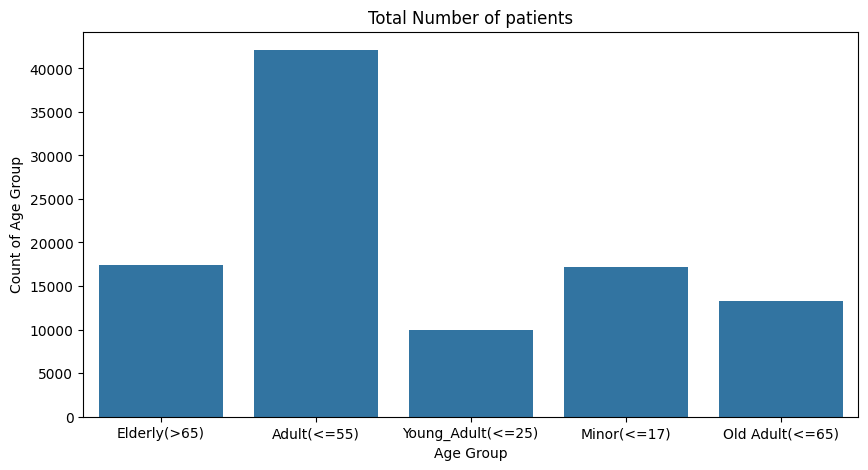

In [42]:
# Data Visualization
# Age_bracket
def Age_bracket(Age):
    if Age <= 17:
        return "Minor(<=17)"
    elif Age <= 25 :
        return "Young_Adult(<=25)"
    elif Age <= 55:
        return "Adult(<=55)"
    elif Age <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"


df['Age_bracket'] = df['Age'].apply(Age_bracket)

# Investigating the group of patients
plt.figure(figsize = (10, 5))
sns.countplot(x='Age_bracket', data=df)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of patients')

    

In [ ]:
# Data Visualization
# Gender

Text(0.5, 1.0, 'Distribution of Patient Gender')

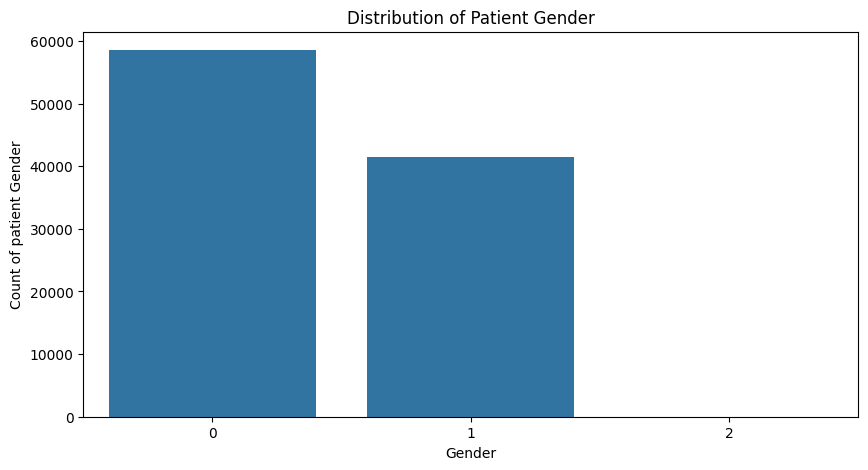

In [43]:
plt.figure(figsize = (10, 5))
sns.countplot(x='Gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count of patient Gender') 
plt.title('Distribution of Patient Gender')

In [ ]:
Female population is more, from the visualization

In [44]:
df.head()

,Gender,Age,Hypertension,Heart_Disease,Smoking_History,BMI,Hemoglobin_Alc_Level,Blood_Glucose_level,Diabetes,Age_bracket
0,0,80.0,0,1,4,25.19,6.6,140,0,Elderly(>65)
1,0,54.0,0,0,0,27.32,6.6,80,0,Adult(<=55)
2,1,28.0,0,0,4,27.32,5.7,158,0,Adult(<=55)
3,0,36.0,0,0,1,23.45,5.0,155,0,Adult(<=55)
4,1,76.0,1,1,1,20.14,4.8,155,0,Elderly(>65)


In [17]:
df.drop(columns=['age_bracket'], inplace=True)

KeyError: "['age_bracket'] not found in axis"

Text(0.5, 1.0, 'Distribution of Smoking History Among Patients')

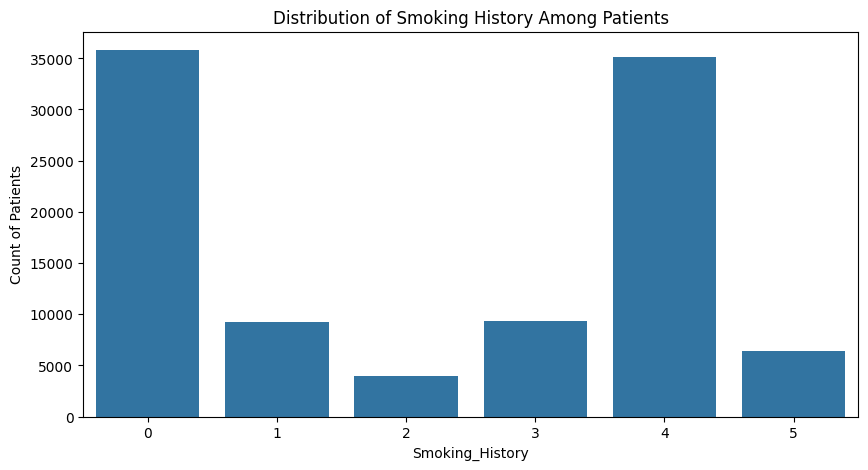

In [45]:
plt.figure(figsize = (10, 5))
sns.countplot(x='Smoking_History', data=df)
plt.xlabel('Smoking_History')
plt.ylabel('Count of Patients') 
plt.title('Distribution of Smoking History Among Patients')

In [ ]:
Never(0) is the highest for smoking among patients

In [16]:
df.head()

,Gender,Age,Hypertension,Heart_Disease,Smoking_History,BMI,Hemoglobin_Alc_Level,Blood_Glucose_level,Diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Text(0.5, 1.0, 'Distribution of Diabetes Among Patients')

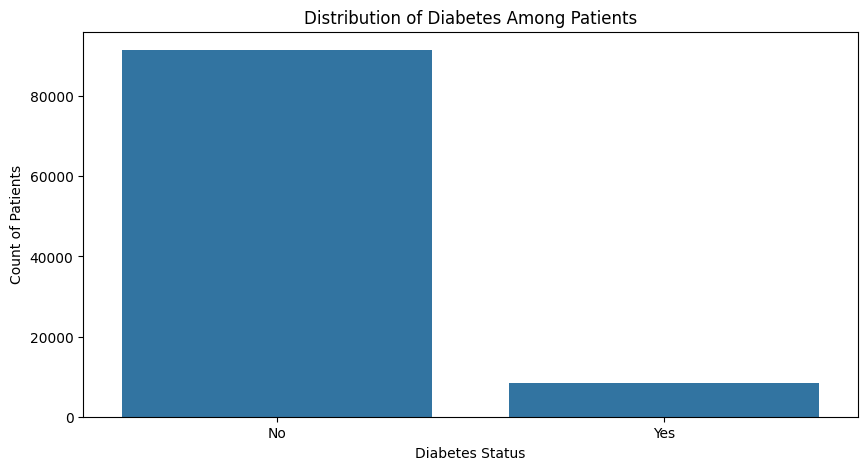

In [46]:
# Data Visualization
# Target has Diabetes or not (1=yes, 0=no)
def label(db):
    if db == 1:
        return "Yes"
    else:
        return "No"


df['Label'] = df['Diabetes'].apply(label)

# Investigating the group of patients
plt.figure(figsize = (10, 5))
sns.countplot(x='Label', data=df)
plt.xlabel('Diabetes Status')
plt.ylabel('Count of Patients')
plt.title('Distribution of Diabetes Among Patients')

In [15]:
df.head()

,Gender,Age,Hypertension,Heart_Disease,Smoking_History,BMI,Hemoglobin_Alc_Level,Blood_Glucose_level,Diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# Data Visualization
# Patient has Hypertension or not (1=yes, 0=no)
def label_HP(HP):
    if HP == 1:
        return "Yes"
    else:
        return "No"


df['Label_Hypertension'] = df['Hypertension'].apply(label_HP)

# Investigating the group of patients
plt.figure(figsize = (10, 5))
sns.countplot(x='Label_Hypertension', data=df)
plt.xlabel('Hypertension Status')
plt.ylabel('Count of Patients')
plt.title('Distribution of Hypertension Among Patients')

In [14]:
df.head()

,Gender,Age,Hypertension,Heart_Disease,Smoking_History,BMI,Hemoglobin_Alc_Level,Blood_Glucose_level,Diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Text(0.5, 1.0, 'Distribution of Hypertension Among Patients')

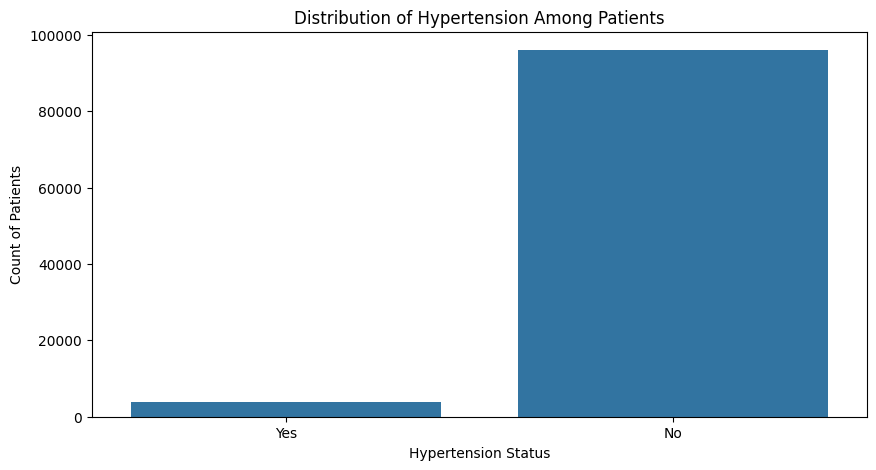

In [47]:
# Data Visualization
# Patient has Hypertension or not (1=yes, 0=no)
def label_HD(HD):
    if HD == 1:
        return "Yes"
    else:
        return "No"


df['Label_HeartDisease'] = df['Heart_Disease'].apply(label_HD)

# Investigating the group of patients
plt.figure(figsize = (10, 5))
sns.countplot(x='Label_HeartDisease', data=df)
plt.xlabel('Hypertension Status')
plt.ylabel('Count of Patients')
plt.title('Distribution of Hypertension Among Patients')

In [ ]:
The "NO" is the majority of not having hypertension

### Bivariate Analysis

Text(0.5, 1.0, 'Total Number of Patients')

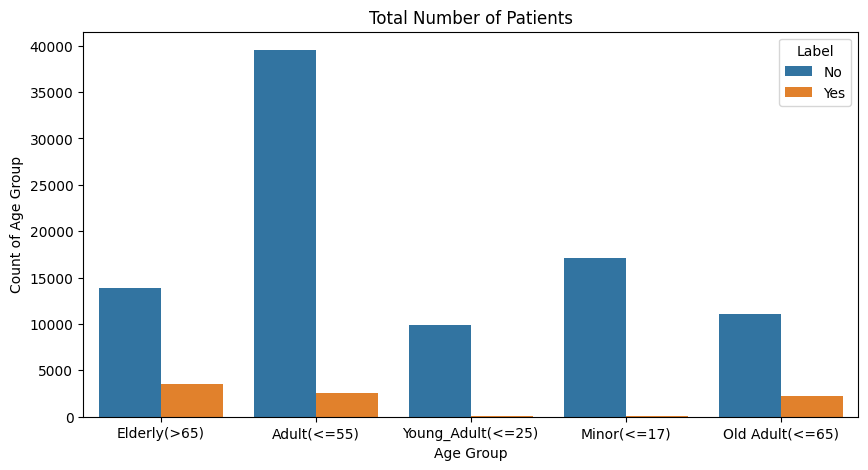

In [48]:
# Investigating the age group of patients by the target feature
plt.figure(figsize = (10, 5))
sns.countplot(x='Age_bracket', data=df, hue='Label')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

The column chart above is comparing different age group with the label, to find out those affected by diabetes, based on age group. 
As displayed above, Adult(<=55) has the highest number of 'no' diabetes and minor (<=17) has the second highest number. Young_Adult(<=25) is the least for "NO" to diabetes.
Elderly >65 has higher Diabetes compared to Adult(<=55),that's 26-55.

Text(0.5, 1.0, 'Distribution of Gender')

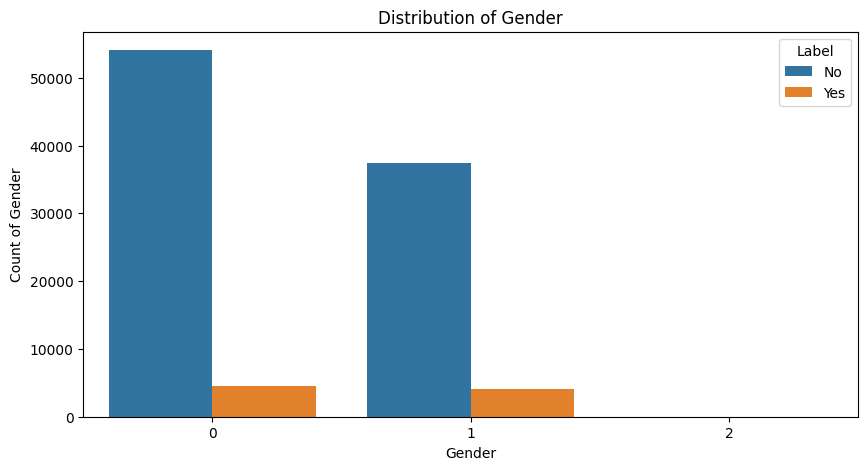

In [152]:
# Investigating the gender of patients by the target feature
plt.figure(figsize = (10, 5))
sns.countplot(x='Gender', data=df, hue='Label')
plt.xlabel('Gender')
plt.ylabel('Count of Gender')
plt.title('Distribution of Gender')

The "Distribution of Gender" column chart above is comparing gender with the label, to find out the kind of patients we have, based on gender. 
As displayed above, Female has the highest number of 'no' diabetes and male has the least number. Likewise "Yes" to diabetes is higher in females than males.

Text(0.5, 1.0, 'Patients Smoking History distribution')

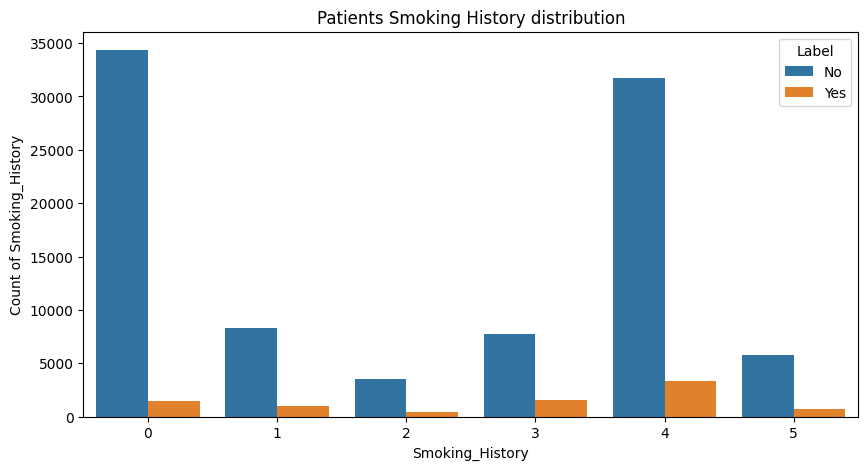

In [49]:
# Investigating the Smoking_History of patients by the target feature
plt.figure(figsize = (10, 5))
sns.countplot(x='Smoking_History', data=df, hue='Label')
plt.xlabel('Smoking_History')
plt.ylabel('Count of Smoking_History')
plt.title('Patients Smoking History distribution')

As seen in the Smoking_History Distribution, patients with "No info" on if they smoke(yes) or not(no) has the highes 'No' on Diabetes, followed by the 'never' smokers. the least is the 'ever' patients.

In [ ]:
df['Gender_encoded'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [13]:
print(df.dtypes)

Gender                   object
Age                     float64
Hypertension              int64
Heart_Disease             int64
Smoking_History          object
BMI                     float64
Hemoglobin_Alc_Level    float64
Blood_Glucose_level       int64
Diabetes                  int64
dtype: object


In [25]:
categorical_data = df.select_dtypes(include="object")
categorical_data.head()

,Gender,Smoking_History
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current


In [12]:
df.head()

,Gender,Age,Hypertension,Heart_Disease,Smoking_History,BMI,Hemoglobin_Alc_Level,Blood_Glucose_level,Diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### Encode 

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
encoder = LabelEncoder()

In [26]:
for column_name in categorical_data:
    print (column_name)

Gender
Smoking_History


In [29]:
for column_name in categorical_data:
    df[column_name] = encoder.fit_transform(df[column_name])

In [30]:
df.head()

,Gender,Age,Hypertension,Heart_Disease,Smoking_History,BMI,Hemoglobin_Alc_Level,Blood_Glucose_level,Diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


Encoded the categorical data to numerical to be easily read

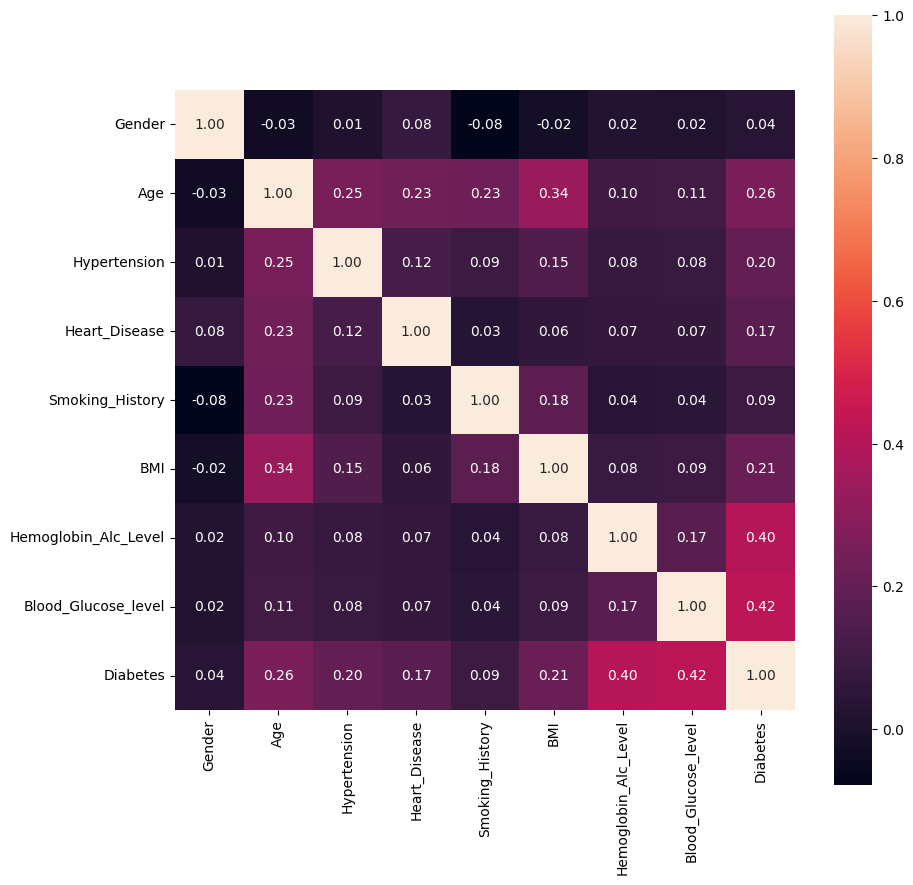

In [31]:
#correlation between Diabetes and other variables in the dataset
plt.figure(figsize = (10, 10))

hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size':10})

In [78]:
# create a copy of the data (exclude diabetes/label alongside other columns that was created)
df1 = df[['Gender','Age', 'Hypertension', 'Heart_Disease', 'Smoking_History', 'BMI', 'Hemoglobin_Alc_Level', 'Blood_Glucose_level']]
label = df[['Diabetes']]

In [79]:
df1.head()

,Gender,Age,Hypertension,Heart_Disease,Smoking_History,BMI,Hemoglobin_Alc_Level,Blood_Glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155


In [80]:
label.head()

,Diabetes
0,0
1,0
2,0
3,0
4,0


In [36]:
df1.dtypes

Gender                    int64
Age                     float64
Hypertension              int64
Heart_Disease             int64
Smoking_History           int64
BMI                     float64
Hemoglobin_Alc_Level    float64
Blood_Glucose_level       int64
dtype: object

In [55]:
# Dealing with outliers - 'BMI', 'Hemoglobin', 'Blood_Alc_Level'

#Normalize the data
scaler = MinMaxScaler()

df1["Scaled_BMI"] = scaler.fit_transform(df1[['BMI']].values.reshape(-1, 1))
df1["Scaled_Hemoglobin"] = scaler.fit_transform(df1[['Hemoglobin_Alc_Level']].values.reshape(-1, 1))
df1["Scaled_BGL"] = scaler.fit_transform(df1[['Blood_Glucose_level']].values.reshape(-1, 1))

df1.drop(['BMI', 'Hemoglobin_Alc_Level', 'Blood_Glucose_level'], axis=1, inplace=True)
df1.head()

,Gender,Age,Hypertension,Heart_Disease,Smoking_History,Scaled_BMI,Scaled_Hemoglobin,Scaled_BGL
0,0,80.0,0,1,4,0.177171,0.563636,0.272727
1,0,54.0,0,0,0,0.202031,0.563636,0.000000
2,1,28.0,0,0,4,0.202031,0.400000,0.354545
3,0,36.0,0,0,1,0.156863,0.272727,0.340909
4,1,76.0,1,1,1,0.118231,0.236364,0.340909


In the table above, I dealt with the outliers in BMI, Hemoglobin and Blood Glucose Level by Normalization.

### Machine Learning

In [82]:
# split the dataset into training and testing sets - x = Questions, y = Answers
x_train, x_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

In [83]:
# Model Building
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
ly_pred = logreg.predict(x_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.95085
Precision: 0.8069432684165961
Recall: 0.5579625292740047
F1-score: 0.6597438560055382
AUC-ROC: 0.7727490319669827


In [ ]:
Using Logistic Regression, i trained the model and also fed it the answers. It shows the accuracy, precision, recall, f1-score, auc-roc

In [85]:
x_test

,Gender,Age,Hypertension,Heart_Disease,Smoking_History,BMI,Hemoglobin_Alc_Level,Blood_Glucose_level
75721,0,13.0,0,0,0,20.82,5.8,126
80184,0,3.0,0,0,0,21.00,5.0,145
19864,1,63.0,0,0,3,25.32,3.5,200
76699,0,2.0,0,0,4,17.43,6.1,126
92991,0,33.0,0,0,5,40.08,6.2,200
...,...,...,...,...,...,...,...,...
32595,0,44.0,0,0,5,21.95,6.0,159
29313,1,61.0,1,0,3,41.98,3.5,90
37862,0,49.0,0,0,4,26.51,4.8,100
53421,1,73.0,0,1,0,27.32,6.6,100


In [103]:
print(ly_pred[:10])

[0 0 0 0 0 0 0 0 0 0]


In [104]:
print(y_test[:10])

       Diabetes
75721         0
80184         0
19864         0
76699         0
92991         1
76434         0
84004         0
80917         0
60767         0
50074         0


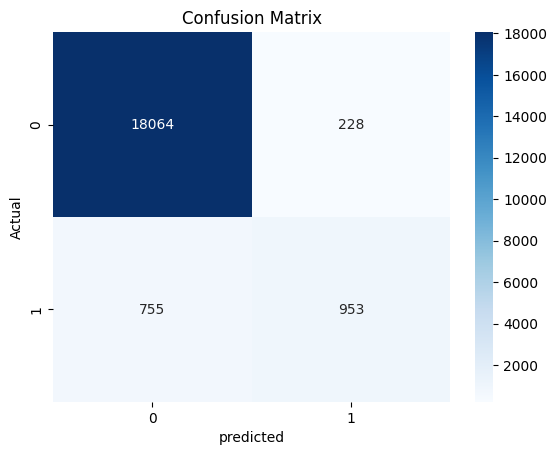

In [106]:
# Create a confusion matrix
lcm = confusion_matrix(y_test, ly_pred)

#Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
Heat map of Logistic Regression. Displays the predicted and actual values.

In [107]:
# Model Building
# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfy_pred = rfc.predict(x_test) 
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Logistic Regression
Accuracy: 0.97015
Precision: 0.9469026548672567
Recall: 0.6891100702576113
F1-score: 0.7976956963741104
AUC-ROC: 0.8427509677769578


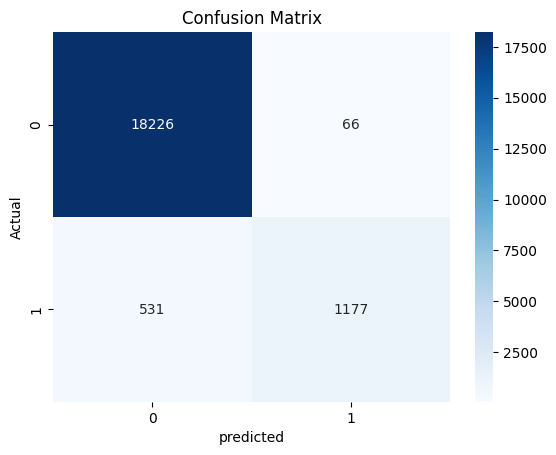

In [109]:
rcm = confusion_matrix(y_test, rfy_pred)

#Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [113]:
# Using for loop to loop through the classifiers
classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Classifier'],
               [SGDClassifier(), 'SGDC Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(), 'Naive Rayes'],
               [DecisionTreeClassifier(random_state = 42), "Decision tree"],
               [LogisticRegression(), "Logistic Regression"]
              ]  

In [115]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators=None,
                n_jobs=None, num_parallel_tree=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Classifier'],
 [SGDClassifier(), 'SGDC Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Rayes'],
 [Decision

In [118]:
# Loop through multiple models
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(x_train, y_train)
    model_name = classifier[1]

    pred = model.predict(x_test)

    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    p_score = roc_auc_score(y_test, pred)

    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(r_score*100, 2)) + '%'])

    if model_name != classifiers[-1][1]:
        print('')
    

In [121]:
# accuracy
acc_list

{'XGB Classifier': ['97.1%'],
 'Random Forest': ['97.01%'],
 'K-Nearest Classifier': ['95.25%'],
 'SGDC Classifier': ['95.2%'],
 'SVC': ['94.73%'],
 'Naive Rayes': ['90.48%'],
 'Decision tree': ['95.25%'],
 'Logistic Regression': ['95.08%']}

In [127]:
print("Precision")
s2 = pd.DataFrame(precision_list)
s2.head()

precision


,XGB Classifier,Random Forest,K-Nearest Classifier,SGDC Classifier,SVC,Naive Rayes,Decision tree,Logistic Regression
0,84.56%,84.35%,75.66%,83.68%,69.17%,78.39%,85.54%,77.27%


In [128]:
print("Recall")
s3 = pd.DataFrame(recall_list)
s3.head()

,XGB Classifier,Random Forest,K-Nearest Classifier,SGDC Classifier,SVC,Naive Rayes,Decision tree,Logistic Regression
0,69.44%,69.09%,52.05%,69.79%,38.35%,63.82%,73.83%,55.8%


In [129]:
print("Roc score")
s4 = pd.DataFrame(roc_list)
s4.head()

Roc score


,XGB Classifier,Random Forest,K-Nearest Classifier,SGDC Classifier,SVC,Naive Rayes,Decision tree,Logistic Regression
0,69.44%,69.09%,52.05%,69.79%,38.35%,63.82%,73.83%,55.8%


Rather than go through each classifier one by one, i'll put them in a for loop to make the whole process efficient.

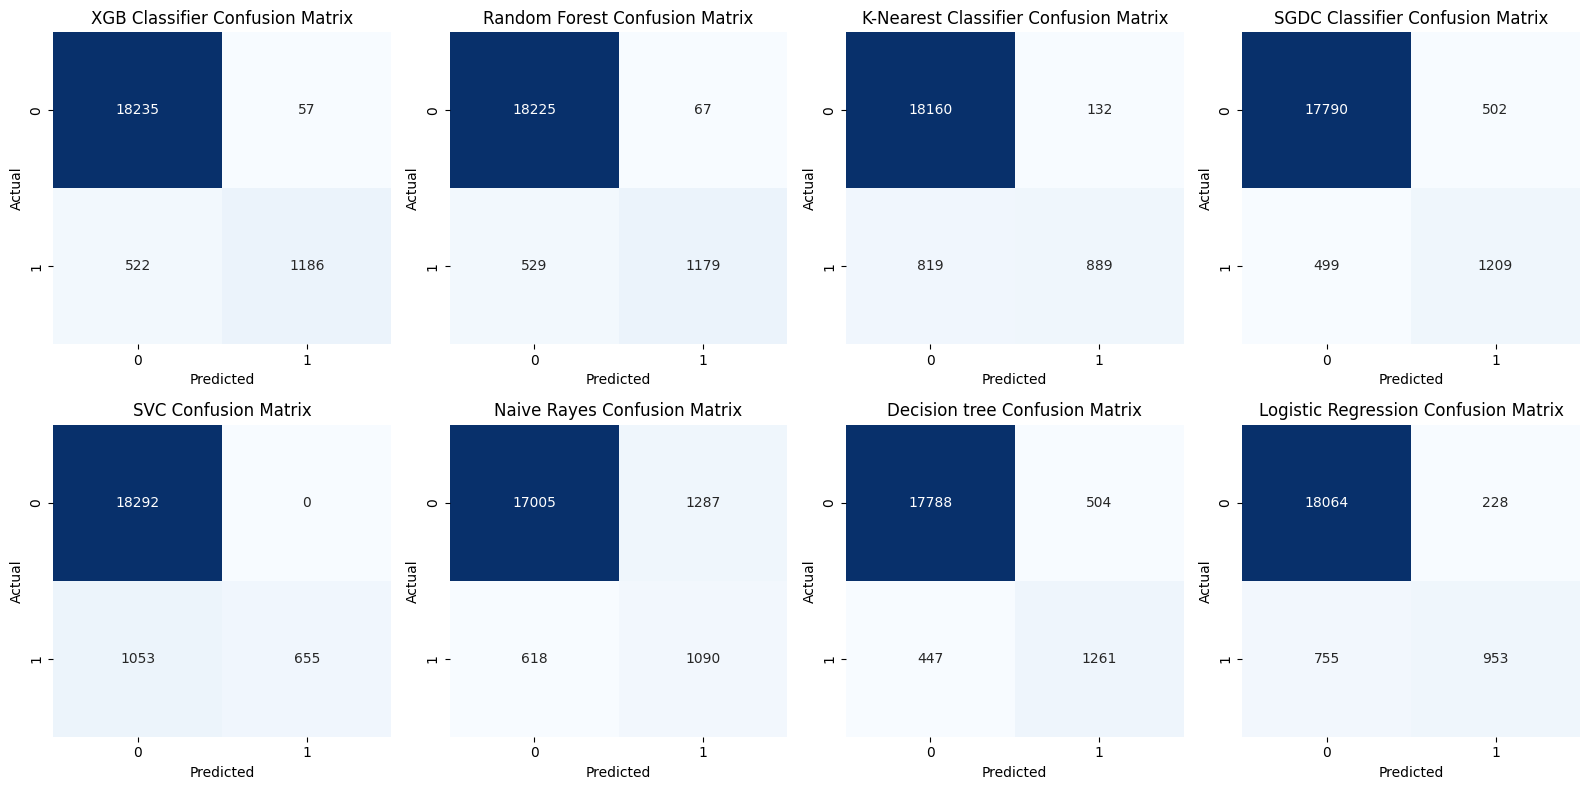

                      Accuracy  Precision  Recall  ROC AUC
XGB Classifier           97.10      95.41   69.44    84.56
Random Forest            97.02      94.62   69.03    84.33
K-Nearest Classifier     95.25      87.07   52.05    75.66
SGDC Classifier          94.99      70.66   70.78    84.02
SVC                      94.73     100.00   38.35    69.17
Naive Rayes              90.48      45.86   63.82    78.39
Decision tree            95.25      71.44   73.83    85.54
Logistic Regression      95.08      80.69   55.80    77.27


In [145]:
# Initialize lists to store the scores
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

# Initialize the plot for confusion matrices
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # Adjust the layout based on number of classifiers
axes = axes.flatten()  # Flatten the 2D array to make indexing easier

# Loop through the classifiers
for idx, classifier in enumerate(classifiers):
    model = classifier[0]
    model_name = classifier[1]

    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    pred = model.predict(x_test)

    # Calculate performance metrics
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)

    # Store metrics in dictionaries
    acc_list[model_name] = round(a_score * 100, 2)
    precision_list[model_name] = round(p_score * 100, 2)
    recall_list[model_name] = round(r_score * 100, 2)
    roc_list[model_name] = round(roc_score * 100, 2)

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[idx]), 

    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

    
    axes[idx].set_title(f"{model_name} Confusion Matrix")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

# Create a DataFrame with the results
results_df = pd.DataFrame({
    'Accuracy': acc_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'ROC AUC': roc_list
})

# Print the results DataFrame
print(results_df)


### Conclusion

In [ ]:
Based on the evaluation of the models, the following insights were drawn for patients diabetes prediction:

Accuracy: The model with the highest accuracy is XGB Classifier, indicating it correctly predicts the most instances.

Precision: XGB Classifier also achieved the best precision, minimizing false positives.

Recall: XGB Classifier performed best in recall, effectively identifying true positives.

ROC AUC: XGB Classifier also led in ROC AUC, showing the best balance between sensitivity and specificity.

Overall, XGB Classifier is the most reliable model for this dataset based on these metrics.

